## Load Data From CSV file

In [1]:
import pandas as pd
df = pd.read_csv('./datasets/Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing Data

In [2]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Gender labeling

In [3]:
df['Gender'] = df['Gender'].astype('category').cat.codes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


## Normalize Data

In [5]:
from sklearn.preprocessing import StandardScaler
X = df.values
scaler = StandardScaler()
dataset = scaler.fit_transform(X)
dataset[0:5]

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992]])

### Lets See how the data is distributed

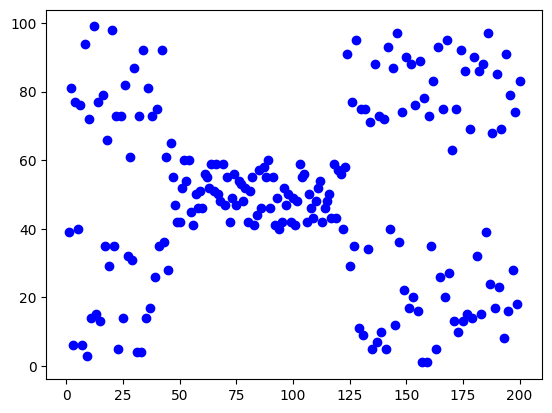

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,4], c='b')

# Modeling

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5 , init='k-means++', n_init=12)
model.fit(X)
labels = model.labels_
centers = model.cluster_centers_

# distribution of customers

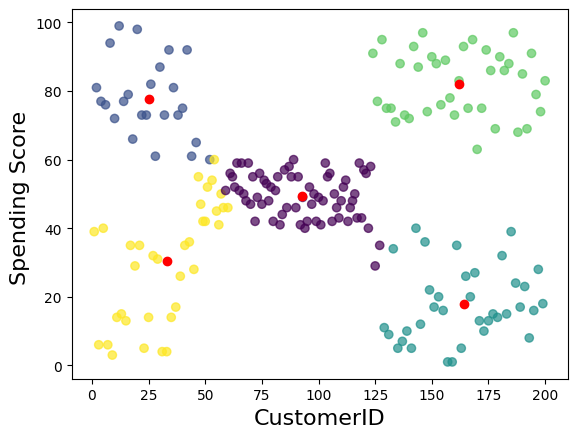

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X[:,0], X[:,4], c=labels, alpha=0.7 )
plt.scatter(centers[:,0], centers[:,4], c='red' , marker='o')
plt.xlabel('CustomerID' , fontsize = 16)
plt.ylabel('Spending Score ' , fontsize = 16)
plt.show()